# Relativistics

Here code examples for properties output from scalar-relativistic (SR) and spin-orbit coupling (SOC) calculations are given. In the following text, these calculations are referred to as 2c-SCF.

**NOTE**

So far due to the efficiency concerns, only 2D densities are available. Developers are working actively to address the 3D plotting issues.

## The 'read_relativistics' method

This method is defined in the `crystal_io.Properties_output` class, which read formatted output files generated by CRYSTAL and return to classes defined in the `relativistics` module (see below). The object is also accessible by calling the `<type>` attribute of the `Properties_output` object.

The standard output and data type is required to identify the sequence and range of 2D vector fields in the fort.25 file. Otherwise the user must explicitly specify `index` which starts from 0.

In [1]:
from CRYSTALpytools.crystal_io import Properties_output

obj = Properties_output('relt_WSe2.out')
obj.read_relativistics('relt_WSe2.f25', type='SPICURDENS')
print('Type: {}'.format(type(obj.SPICURDENS)))
print('Base vectors (point A, B, C):')
print(obj.SPICURDENS.base)
print('Jx dimensionality:')
print(obj.SPICURDENS.data_x.shape)

Type: <class 'CRYSTALpytools.relativistics.SpinCurrentDensity'>
Base vectors (point A, B, C):
[[ 0.          1.72622369  0.        ]
 [ 0.          0.          0.        ]
 [ 1.49495208 -0.8631092   0.        ]]
Jx dimensionality:
(50, 50, 3)


With the same object and file, get magnetization.

In [2]:
obj.read_relativistics('relt_WSe2.f25', type='MAGNETIZ')
print('Type: {}'.format(type(obj.MAGNETIZ)))
print('Base vectors (point A, B, C):')
print(obj.MAGNETIZ.base)
print('Data dimensionality:')
print(obj.MAGNETIZ.data.shape)

Type: <class 'CRYSTALpytools.relativistics.Magnetization'>
Base vectors (point A, B, C):
[[ 0.          1.72622369  0.        ]
 [ 0.          0.          0.        ]
 [ 1.49495208 -0.8631092   0.        ]]
Data dimensionality:
(50, 50, 3)


## The 'relativistics' module

So far the relativistics module is mainly developed for 2D plotting proposes.

### The 'ChargeDensity' class

The `ChargeDensity` class is the same as the `electronics.ChargeDensity` class, with the spin dimension equals to 1. Only the `from_file` classmethod is redefined. Output is mandatory.

Instantiate the object and plot charge density.

Type: <class 'CRYSTALpytools.relativistics.ChargeDensity'>


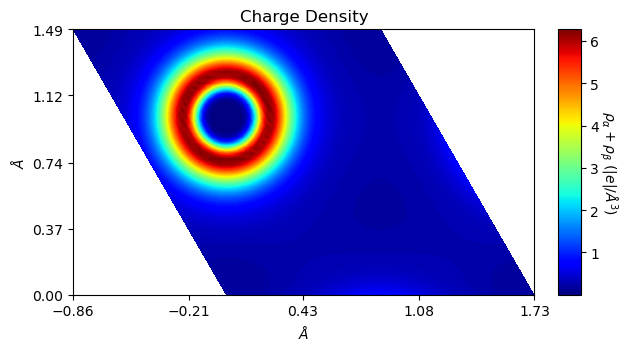

In [3]:
from CRYSTALpytools.relativistics import ChargeDensity

obj = ChargeDensity.from_file('relt_WSe2.f25', 'relt_WSe2.out')
print('Type: {}'.format(type(obj)))

fig = obj.plot_2D(option='charge')

### The 'VectorField'-based classes

The `VectorField` class is the basic class for vector fields obtained by 2c-SCF. Depending on the specific properties, child classes are generated, which shares similar methods:

`Magnetization`, `OrbitalCurrentDensity` and `SpinCurrentDensity`.

All the classes are aimed to be independent of dimensionality, but currently only 2D data has been implemented.

Express plotting of magnetization field of WSe2 on W atom plane.

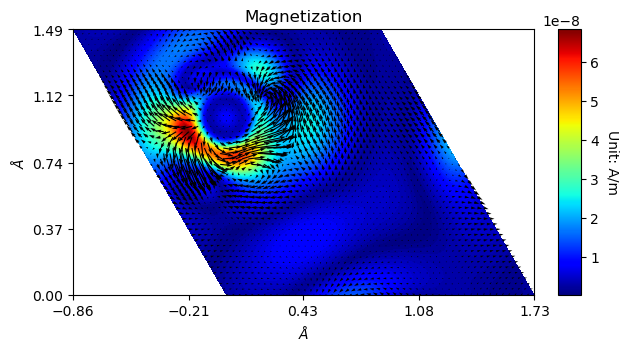

In [4]:
from CRYSTALpytools.relativistics import Magnetization

fig = Magnetization.from_file('relt_WSe2.f25', 'relt_WSe2.out').plot_2D()

The color-filled contours represent the length of vectors in 3D space. The quiver plot marks the projection of these vectors on the plane.

Similarly, a color-coded quiver plot can be obtained.

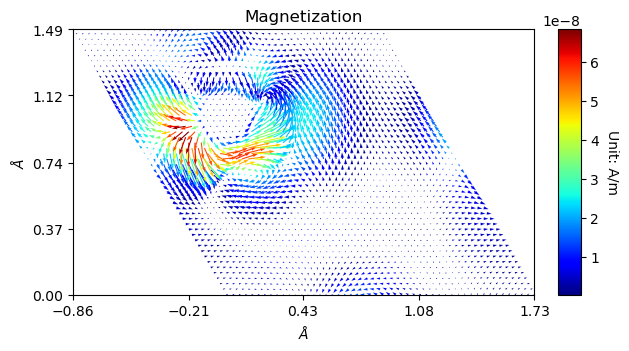

In [5]:
from CRYSTALpytools.relativistics import Magnetization

fig = Magnetization.from_file('relt_WSe2.f25', 'relt_WSe2.out').plot_2D(
    quiverplot=True, colorplot=False
)

With `quiverplot=False` and `colorplot=True`, the scalar field of vector norms can be obtained.

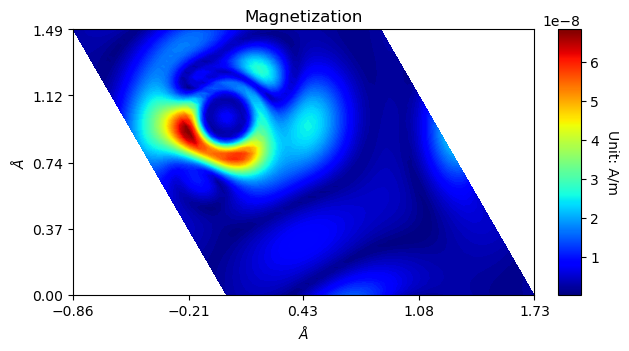

In [6]:
from CRYSTALpytools.relativistics import Magnetization

fig = Magnetization.from_file('relt_WSe2.f25', 'relt_WSe2.out').plot_2D(
    quiverplot=False, colorplot=True
)

In any cases, the figure manipulation option can be enabled, though it is trickier to 'hide' the original bounaries.

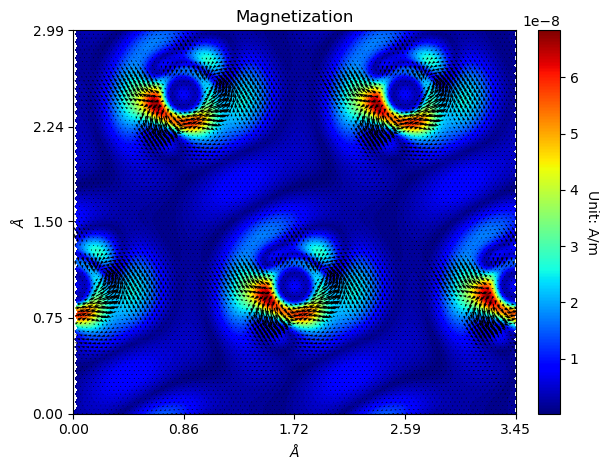

In [7]:
from CRYSTALpytools.relativistics import Magnetization

fig = Magnetization.from_file('relt_WSe2.f25', 'relt_WSe2.out').plot_2D(
    rectangle=True, a_range=[-1, 1], b_range=[-1, 1]
)

For spin-current densities, `direction` should be specified as a string or a list of string to plot $J^{x}$, $J^{y}$ or $J^{z}$.

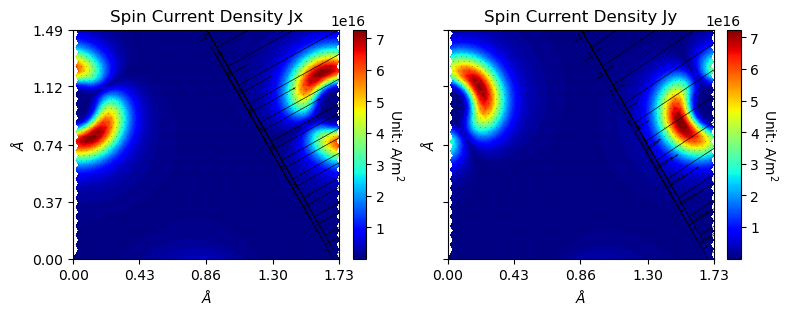

In [8]:
from CRYSTALpytools.relativistics import SpinCurrentDensity

fig = SpinCurrentDensity.from_file('relt_WSe2.f25', 'relt_WSe2.out').plot_2D(
    direction=['x', 'y'], figsize=[8, 6],  rectangle=True,
)

## The 'plot_relativistics2D' function

Similar to other modules, the `plot.plot_relativistics2D()` function manages multiple objects / files and set the uniform scale for them.

**NOTE**

1. Not for the `ChargeDensity` class. Use the `plot.plot_ECHG()` for them.  
2. For filename inputs, the standard screen output is mandatory and should be given as string or a list of string for every input file.

Plot the orbital and spin current densities ($J^{z}$) into 3 subplots.

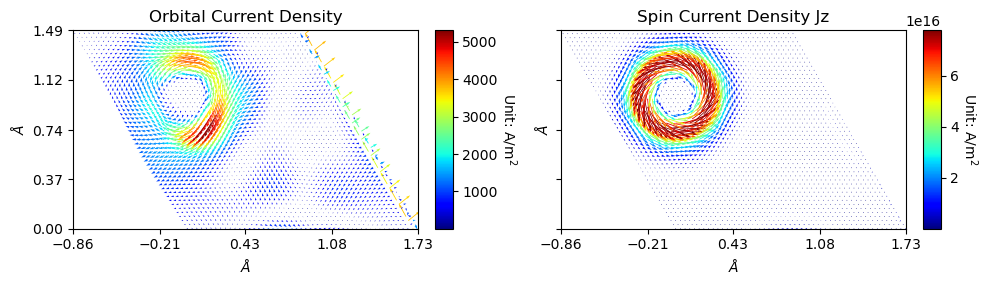

In [9]:
from CRYSTALpytools.plot import plot_relativistics2D

fig = plot_relativistics2D(
    'relt_WSe2.f25', type=['ORBCURDENS', 'SPICURDENS'], output='relt_WSe2.out',
    colorplot=False, direction='z', layout=[1, 2], figsize=[10, 6])

For more details, please refer to the module-specific documentations.